In [1]:
import time
start_time=time.time()

Abstract

Se presenta un ajuste polinomial (0-6 ord) a los datos observacionales para investigar movimientos a gran escala (detrended data) en direciones X y Y.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import os

import itertools
from scipy.interpolate import interp1d
from scipy import interpolate

from astropy.io import fits

from downsample import downsample

from SABReXX import sosf,acf,psk,ps,sosfnorm,sosfw,sosfw2,sosfs,sosfnorms,sfwh,pst
from CorrPoldef import CPV,CPH
from LRdefX import LR,ACLR
from Pltdef import pltdata

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

Input Data

In [3]:
n=7

datap='604.TAURUS.Ha.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
#os.remove(datap)
dt.describe()

,Y,X,RV,I,Sig
count,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000
mean,41.466091,44.974723,3.559222,4.842105,17.158661
std,14.020423,15.737121,7.096471,2.334820,11.504247
min,2.000000,11.000000,-11.585000,1.655000,0.000000
25%,32.000000,31.000000,-1.606875,3.255625,6.550000
50%,42.000000,45.000000,1.958750,4.171250,19.717500
75%,51.000000,59.750000,7.538750,5.917500,24.030000
max,73.000000,75.000000,28.155000,14.815000,50.990000


In [4]:
wd=dt.X.max()-dt.X.min()
hd=dt.Y.max()-dt.Y.min()
ar=wd/hd
sz=4

Statistical Data

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


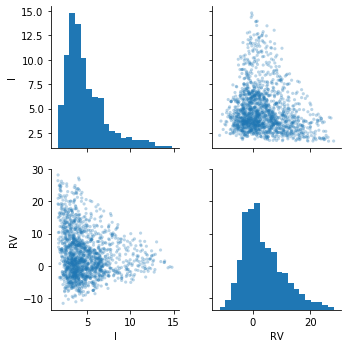

In [5]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


Emission Map

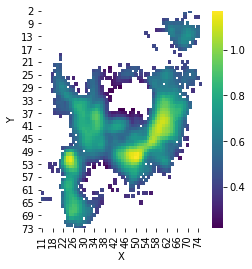

In [6]:
datal=dt.copy()
datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
#datal.Y=datal.Y.astype(int)

dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataH_f, cmap="viridis",xticklabels='auto')
#plt.gca().invert_yaxis()
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="16"

Radial Velocity

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


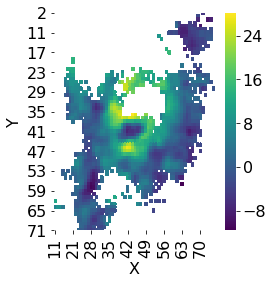

In [7]:
datal=dt.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataH_rv, cmap="viridis")
#plt.gca().invert_yaxis()

Weighted property

In [8]:
W=np.log(abs((dt.RV*dt.I)/dt.I.sum()))
W.head()

0   -6.200951
1   -6.899604
2   -6.019609
3   -5.810357
4   -6.005278
dtype: float64

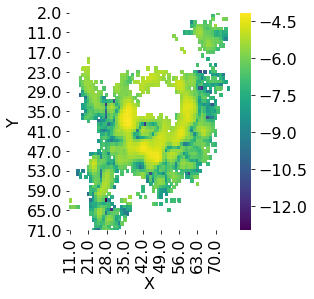

In [9]:
dtW=[dt.X,dt.Y,W]
dtW=pd.DataFrame(dtW).T
dtW.columns=['X','Y','W']

dtH_W=(dtW.round(2)).pivot(index='Y', columns='X', values='W')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dtH_W, cmap="viridis")
#plt.gca().invert_yaxis()


Horizontal Polynomial Correction

 
3.559
 
-0.06213 x + 6.353
          2
-0.01493 x + 1.294 x - 20.72
            3           2
-0.0002373 x + 0.01725 x - 0.06085 x - 3.302
           4            3          2
4.111e-05 x - 0.007599 x + 0.4849 x - 12.43 x + 110.9
           5             4            3          2
9.952e-08 x + 1.914e-05 x - 0.005753 x + 0.4115 x - 11.06 x + 101.4
            6             5            4           3         2
-5.799e-08 x + 1.525e-05 x - 0.001561 x + 0.07776 x - 1.934 x + 21.86 x - 77.66


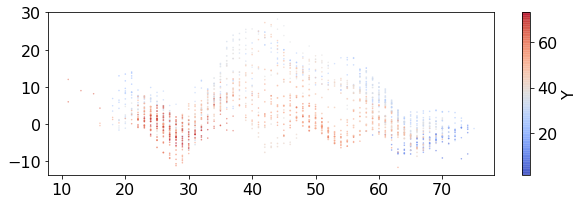

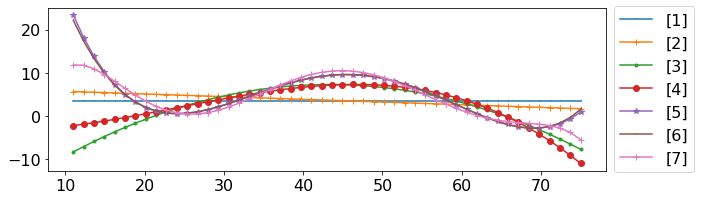

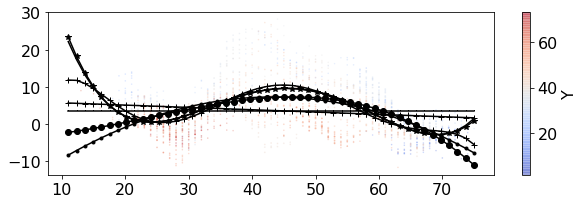

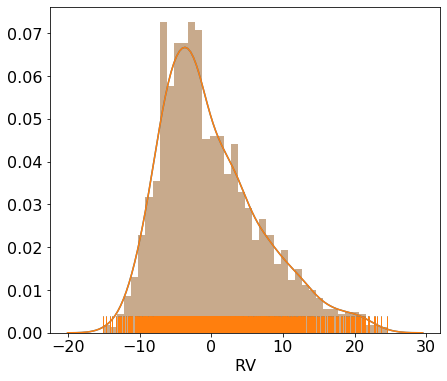

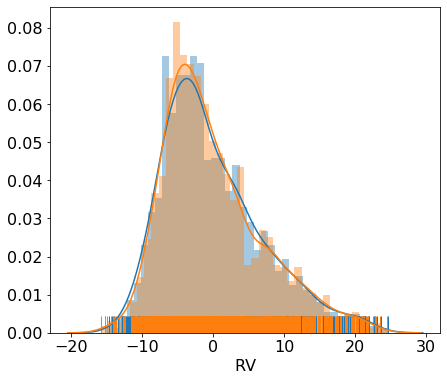

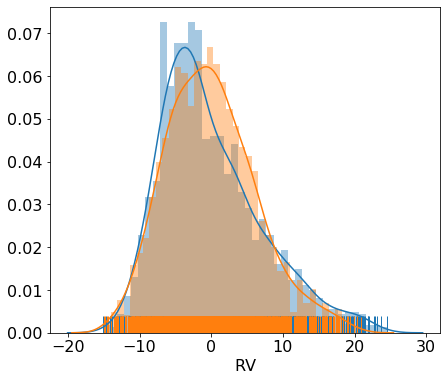

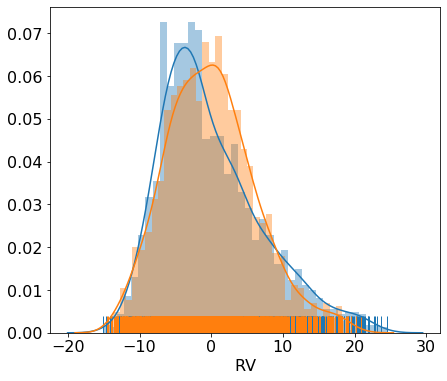

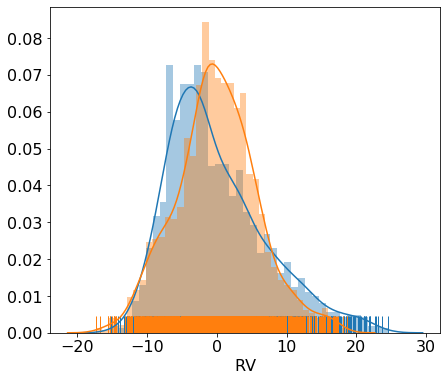

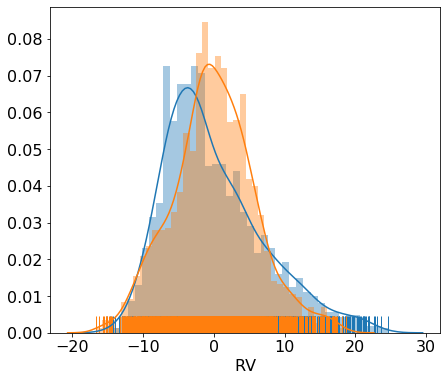

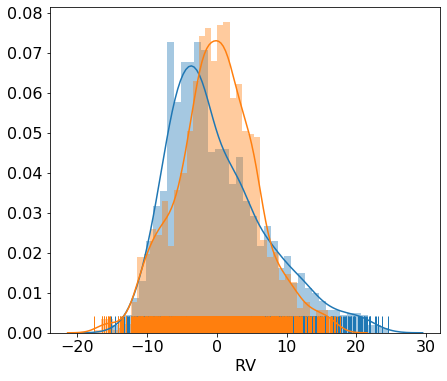

In [10]:
argo1=CPH(dt,n)

Vertical Polynomial Correction

 
3.559
 
-0.08407 x + 7.045
           2
-0.009097 x + 0.6515 x - 6.027
           3           2
0.0003719 x - 0.05348 x + 2.219 x - 21.45
            4             3          2
-1.013e-06 x + 0.0005327 x - 0.0622 x + 2.404 x - 22.64
            5             4            3          2
-4.373e-07 x + 8.552e-05 x - 0.005834 x + 0.1513 x - 0.7578 x - 7.072
           6             5             4           3         2
9.214e-09 x - 2.575e-06 x + 0.0002785 x - 0.01438 x + 0.343 x - 2.759 x + 0.2448


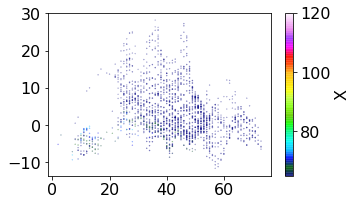

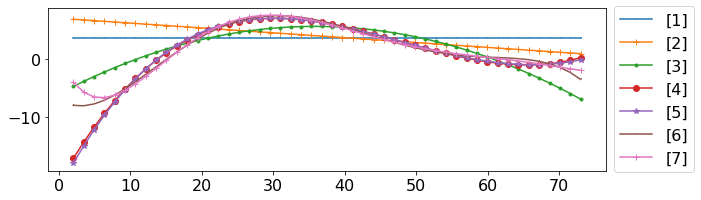

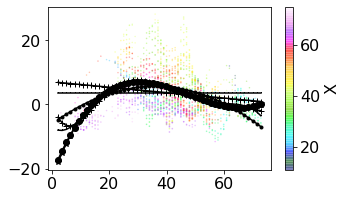

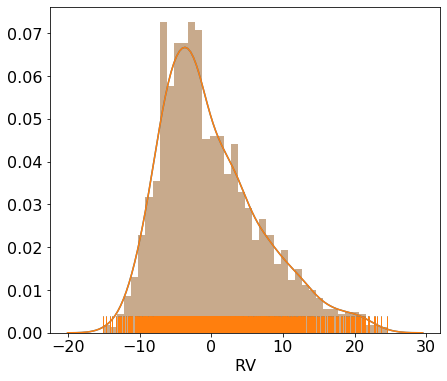

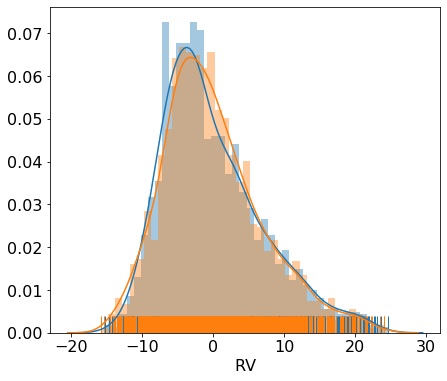

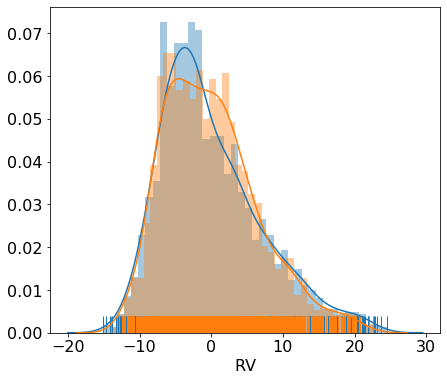

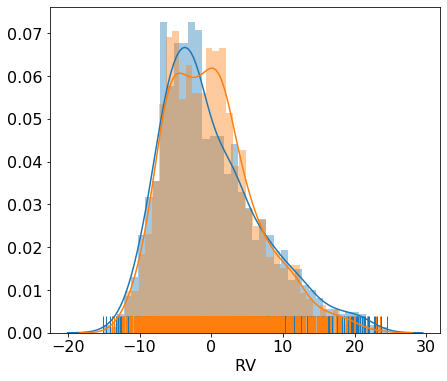

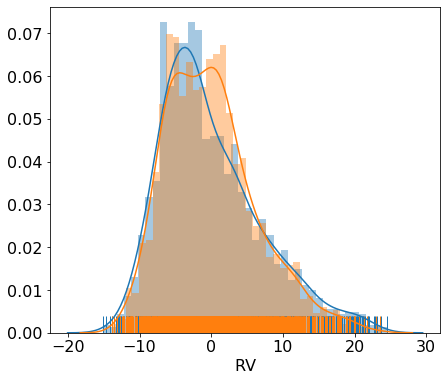

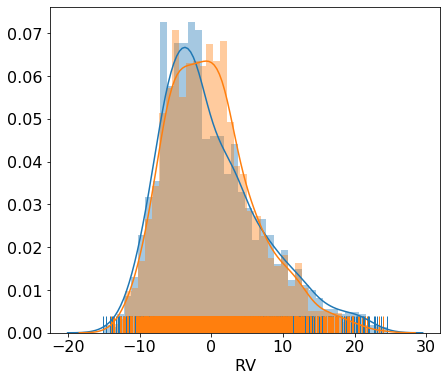

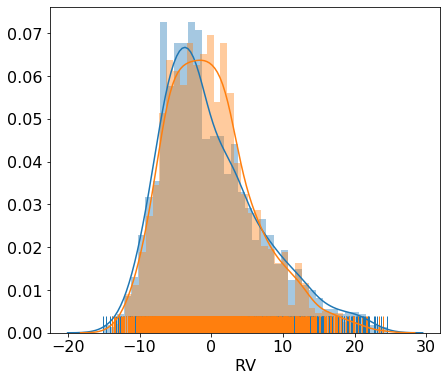

In [11]:
argo2=CPV(dt,n)

Structure Function

In [12]:
SF1=dict()

for i in range(n):
    SF1[i]=sosf(argo1[i])
    
SF2=dict()

for i in range(n):
    SF2[i]=sosf(argo2[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


In [13]:
xi=1
xf=35

SF1Data=dict()
SF1Pr=dict()

for i in range(n):
    SF1Data[i],SF1Pr[i]=LR(SF1[i]['Lag'],SF1[i]['Nmqvd'],SF1[i]['ErrY'],xi,xf,n)
    
SF2Data=dict()
SF2Pr=dict()


for i in range(n):
    SF2Data,SF2Pr[i]=LR(SF2[i]['Lag'],SF2[i]['Nmqvd'],SF2[i]['ErrY'],xi,xf,n)

In [14]:
SF1Data,SF2Data

({0:               R        eps     alpha  lags
  Value  0.862016  17.735140  0.609017   2.0
  Err    0.000452   0.128585  0.001659  35.0,
  1:               R        eps     alpha  lags
  Value  0.857010  17.851535  0.603869   2.0
  Err    0.000417   0.130944  0.001690  35.0,
  2:               R        eps     alpha  lags
  Value  0.747420  21.388168  0.458526   2.0
  Err    0.000111   0.159995  0.001737  35.0,
  3:               R        eps     alpha  lags
  Value  0.739728  21.462405  0.455092   2.0
  Err    0.000076   0.160222  0.001723  35.0,
  4:               R        eps     alpha  lags
  Value  0.747354  20.770589  0.433229   2.0
  Err    0.000163   0.164416  0.001882  35.0,
  5:               R        eps     alpha  lags
  Value  0.747645  20.734327  0.434200   2.0
  Err    0.000164   0.164326  0.001884  35.0,
  6:               R        eps     alpha  lags
  Value  0.739335  20.798017  0.429705   2.0
  Err    0.000244   0.166751  0.001919  35.0},
              R        eps

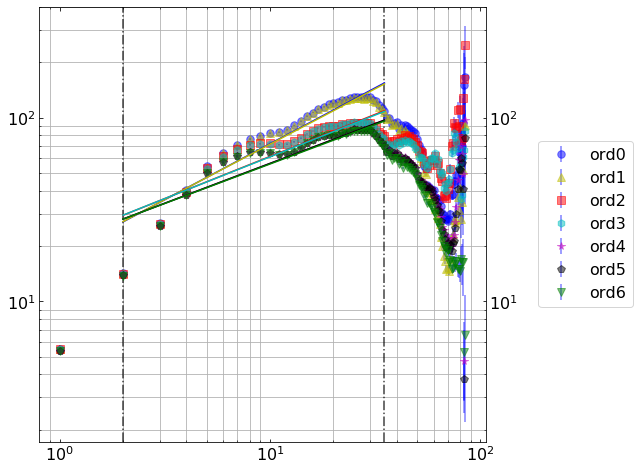

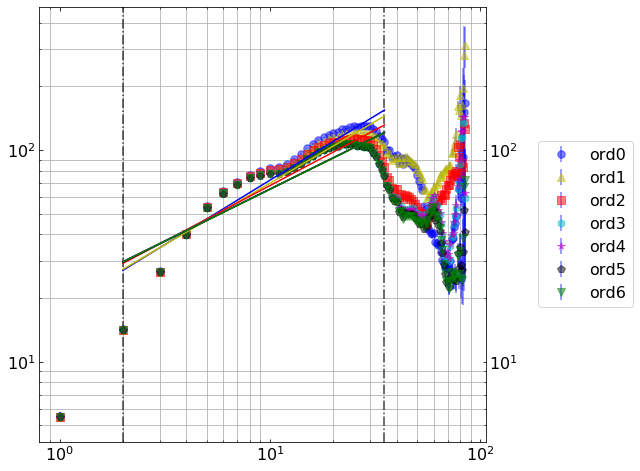

In [15]:
pltdata(SF1,SF1Pr,xi,xf,n)
pltdata(SF2,SF2Pr,xi,xf,n)

Structure Function Norm

In [16]:
SFn1=dict()

for i in range(n):
    SFn1[i]=sosfnorm(argo1[i])
    
SFn2=dict()

for i in range(n):
    SFn2[i]=sosfnorm(argo2[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:695: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:704: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


In [17]:
xi=1
xf=35

SFN1Data=dict()
SFN1Pr=dict()

for i in range(n):
    SFN1Data[i],SFN1Pr[i]=LR(SFn1[i]['Lag'],SFn1[i]['Nmqvd'],SFn1[i]['ErrY'],xi,xf,n)
    
SFN2Data=dict()
SFN2Pr=dict()

for i in range(n):
    SFN2Data[i],SFN2Pr[i]=LR(SFn2[i]['Lag'],SFn2[i]['Nmqvd'],SFn2[i]['ErrY'],xi,xf,n)

In [18]:
SFN1Data,SFN2Data

({0:               R       eps     alpha  lags
  Value  0.862003  0.352254  0.609145   2.0
  Err    0.000462  0.002564  0.001666  35.0,
  1:               R       eps     alpha  lags
  Value  0.856923  0.361443  0.603985   2.0
  Err    0.000412  0.002665  0.001704  35.0,
  2:               R       eps     alpha  lags
  Value  0.747381  0.538390  0.458509   2.0
  Err    0.000070  0.003988  0.001716  35.0,
  3:               R       eps     alpha  lags
  Value  0.739719  0.547874  0.455114   2.0
  Err    0.000116  0.004147  0.001756  35.0,
  4:               R       eps     alpha  lags
  Value  0.747420  0.598884  0.433234   2.0
  Err    0.000175  0.004716  0.001867  35.0,
  5:               R       eps     alpha  lags
  Value  0.747805  0.598155  0.434107   2.0
  Err    0.000171  0.004709  0.001866  35.0,
  6:               R       eps     alpha  lags
  Value  0.739349  0.613011  0.429618   2.0
  Err    0.000248  0.004980  0.001958  35.0},
 {0:               R       eps     alpha  lags


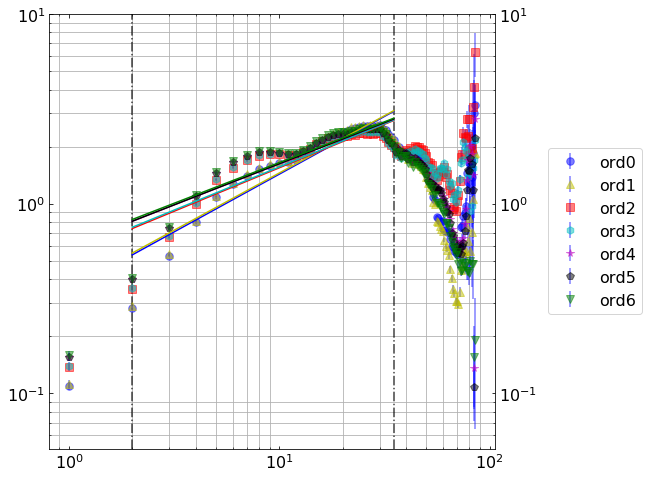

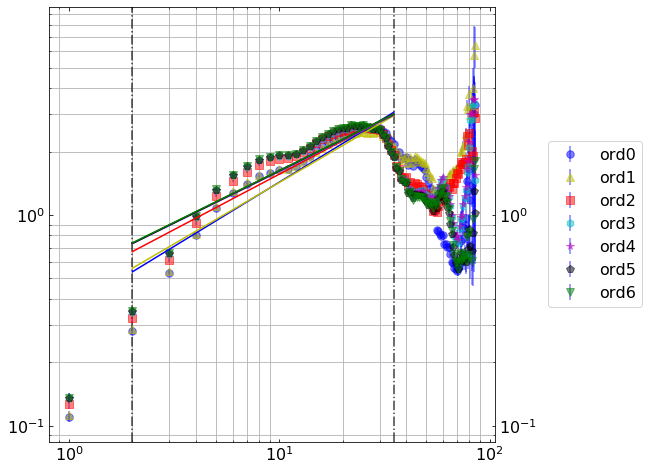

In [19]:
pltdata(SFn1,SFN1Pr,xi,xf,n)
pltdata(SFn2,SFN2Pr,xi,xf,n)

Weighted Structure Function

In [20]:
SFw1=dict()

for i in range(n):
    SFw1[i]=sosfw(argo1[i])

SFw2=dict()

for i in range(n):
    SFw2[i]=sosfw(argo2[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1171: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1180: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


In [21]:
#xi=1
#xf=8

#SFW1Data=dict()
#SFW1Pr=dict()


#for i in range(n):
#    SFW1Data[i],SFW1Pr[i]=LR(SFw1[i]['Lag'],SFw1[i]['Nmqvd'],SFw1[i]['ErrY'],xi,xf,n)
    
#SFW2Data=dict()
#SFW2Pr=dict()


#for i in range(n):
#    SFW2Data[i],SFW2Pr[i]=LR(SFw2[i]['Lag'],SFw2[i]['Nmqvd'],SFw2[i]['ErrY'],xi,xf,n)

In [22]:
#SFW1Data,SFW2Data

In [23]:
#pltdata(SFw1,SFW1Pr,xi,xf,n)
#pltdata(SFw2,SFW2Pr,xi,xf,n)

Weighted Property

In [24]:
SFwII1=dict()

for i in range(n):
    SFwII1[i]=sosfw2(argo1[i])
    
SFwII2=dict()

for i in range(n):
    SFwII2[i]=sosfw2(argo1[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1651: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1660: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f


In [25]:
xi=1
xf=15

SFWII1Data=dict()
SFWII1Pr=dict()

for i in range(n):
    SFWII1Data[i],SFWII1Pr[i]=LR(SFwII1[i]['Lag'],SFwII1[i]['Nmqvd'],SFwII1[i]['ErrY'],xi,xf,n)
    
SFWII2Data=dict()
SFWII2Pr=dict()

for i in range(n):
    SFWII2Data[i],SFWII2Pr[i]=LR(SFwII2[i]['Lag'],SFwII2[i]['Nmqvd'],SFwII2[i]['ErrY'],xi,xf,n)

In [26]:
SFWII1Data,SFWII2Data

({0:               R       eps     alpha  lags
  Value  0.802805  0.353952  0.755931   2.0
  Err    0.000542  0.002965  0.002520  15.0,
  1:               R       eps     alpha  lags
  Value  0.804709  0.354646  0.753701   2.0
  Err    0.000555  0.002973  0.002524  15.0,
  2:               R       eps     alpha  lags
  Value  0.733131  0.458121  0.671784   2.0
  Err    0.000785  0.003840  0.002430  15.0,
  3:               R       eps     alpha  lags
  Value  0.737528  0.450390  0.680015   2.0
  Err    0.000725  0.003785  0.002405  15.0,
  4:               R       eps     alpha  lags
  Value  0.755394  0.449429  0.683453   2.0
  Err    0.000576  0.003928  0.002448  15.0,
  5:               R       eps     alpha  lags
  Value  0.758874  0.445160  0.687685   2.0
  Err    0.000586  0.003733  0.002271  15.0,
  6:               R       eps     alpha  lags
  Value  0.774666  0.434249  0.700804   2.0
  Err    0.000520  0.003665  0.002293  15.0},
 {0:               R       eps     alpha  lags


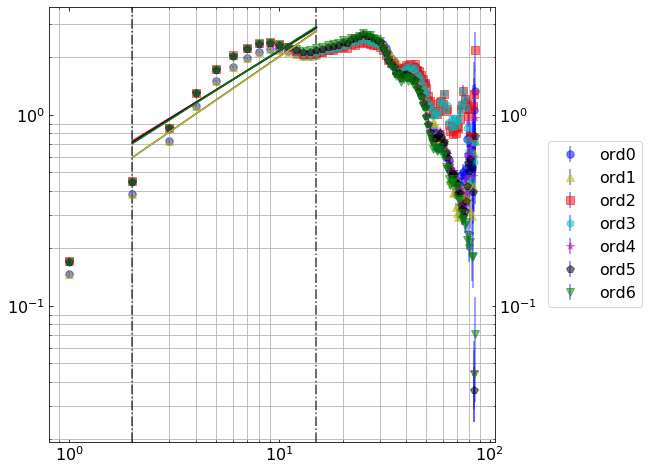

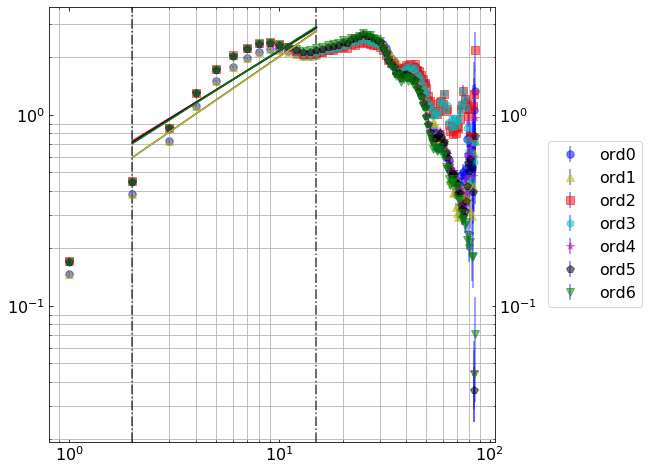

In [27]:
pltdata(SFwII1,SFWII1Pr,xi,xf,n)
pltdata(SFwII2,SFWII2Pr,xi,xf,n)

Structure Function Dr. Will

In [28]:
SFwh1=dict()

for i in range(n):
    SFwh1[i]=sfwh(argo1[i])
    
SFwh2=dict()

for i in range(n):
    SFwh2[i]=sfwh(argo2[i])

/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [29]:
xi=1
xf=65

SFwh1Data=dict()
SFwh1Pr=dict()

for i in range(n):
    SFwh1Data[i],SFwh1Pr[i]=LR(SFwh1[i]['Lag'],SFwh1[i]['Nmqvd'],SFwh1[i]['ErrY'],xi,xf,n)
    
SFwh2Data=dict()
SFwh2Pr=dict()

for i in range(n):
    SFwh2Data[i],SFwh2Pr[i]=LR(SFwh2[i]['Lag'],SFwh2[i]['Nmqvd'],SFwh2[i]['ErrY'],xi,xf,n)

In [30]:
SFwh1Data,SFwh2Data

({0:               R        eps     alpha   lags
  Value  0.743043  11.225272  1.208619  1.250
  Err    0.001441   0.248057  0.001578  5.646,
  1:               R        eps     alpha   lags
  Value  0.740410  11.144054  1.206085  1.250
  Err    0.001421   0.247987  0.001555  5.646,
  2:               R        eps     alpha   lags
  Value  0.738700  12.002342  1.147045  1.250
  Err    0.001962   0.262644  0.001329  5.646,
  3:               R        eps     alpha   lags
  Value  0.737212  11.813389  1.150691  1.250
  Err    0.001967   0.256592  0.001080  5.646,
  4:               R        eps     alpha   lags
  Value  0.703703  11.699962  1.119817  1.250
  Err    0.001911   0.253351  0.000440  5.646,
  5:               R        eps     alpha   lags
  Value  0.703510  11.663650  1.121179  1.250
  Err    0.001898   0.252679  0.000416  5.646,
  6:               R        eps     alpha   lags
  Value  0.693766  11.396958  1.124387  1.250
  Err    0.001986   0.245568  0.000134  5.646},
 {0: 

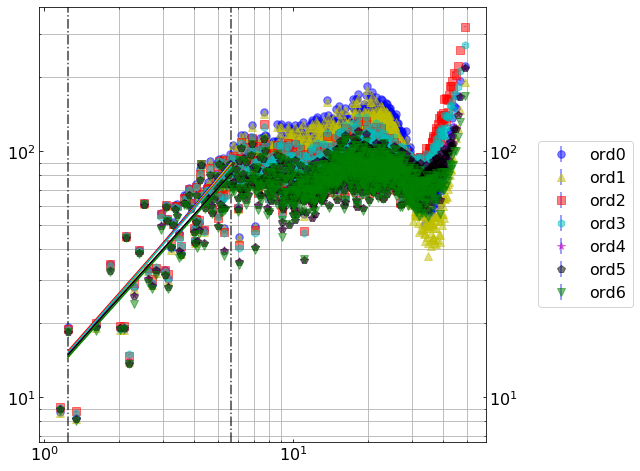

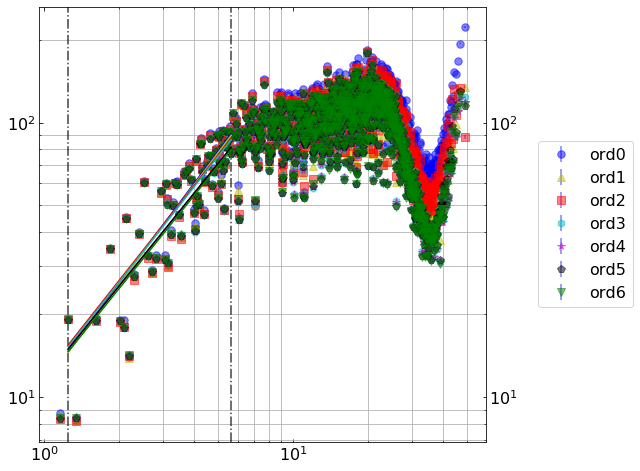

In [31]:
pltdata(SFwh1,SFwh1Pr,xi,xf,n)
pltdata(SFwh2,SFwh1Pr,xi,xf,n)

Autocorrelation Function

In [32]:
AF1=dict()

for i in range(n):
    AF1[i]=acf(argo1[i])
    
AF2=dict()

for i in range(n):
    AF2[i]=acf(argo2[i])

In [33]:
AF1Data=dict()
AF1Inter=dict()


for i in range(n):

    AF1Data[i],AF1Inter[i]=ACLR(AF1[i])
    
AF2Data=dict()
AF2Inter=dict()


for i in range(n):

    AF2Data[i],AF2Inter[i]=ACLR(AF2[i])
    

AF1Data,AF2Data 

({0: array([19.53974592, 52.04696608]),
  1: array([19.63925909, 51.69566046]),
  2: array([22.8398035 , 55.48943961, 73.58349698, 78.58176165]),
  3: array([21.79816437, 60.74140391, 72.98198978, 78.8069333 ]),
  4: array([23.06330593, 59.17616741]),
  5: array([22.97590452, 59.08438817]),
  6: array([22.72916651, 57.7042607 ])},
 {0: array([19.53974592, 52.04696608]),
  1: array([19.05477218, 49.67038801, 78.64374765, 82.46895354]),
  2: array([16.6894227 , 36.65198022, 61.76484787]),
  3: array([16.85115929, 36.70653922, 58.29468048, 78.6529865 , 82.60280279]),
  4: array([16.85834805, 36.76061957, 58.28762351, 78.4885946 ]),
  5: array([16.69191813, 36.8147288 , 58.16164187, 78.01764784]),
  6: array([16.72033805, 36.8088044 , 57.96078694, 77.86934705])})

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


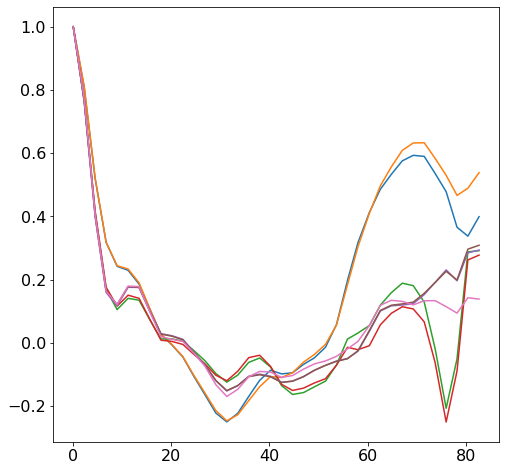

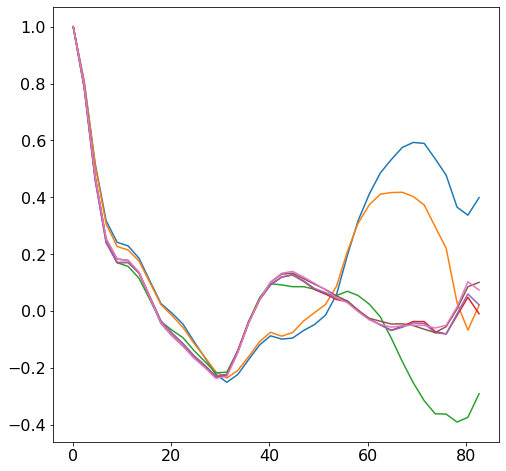

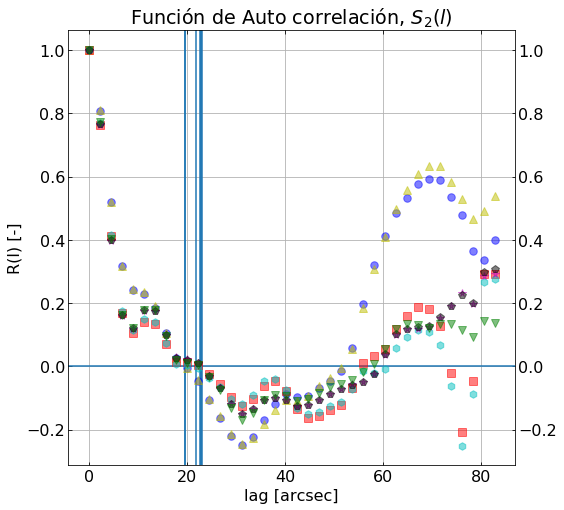

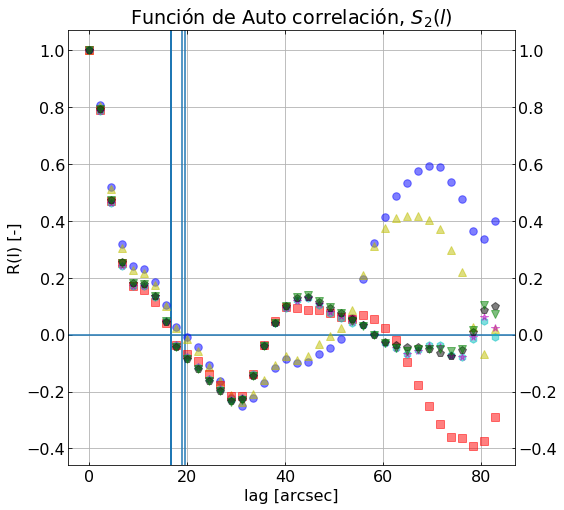

In [34]:
fig, ax=plt.subplots(figsize=(8,8))

for i in range(n):
    plt.plot(AF1[i]['Lag'],AF1[i]['Nmqvd'])

fig, ax=plt.subplots(figsize=(8,8))
    
for i in range(n):
    plt.plot(AF2[i]['Lag'],AF2[i]['Nmqvd'])
    
marker=itertools.cycle(('o','^','s','h','*','p','v'))
color=itertools.cycle(('b','y','r','c','m','k','g'))

fig, ax=plt.subplots(figsize=(8,8))

for i in range(n):
    ax.errorbar(AF1Inter[i][0],AF1Inter[i][1],fmt=next(marker),color=next(color), ecolor='b', alpha=0.5, markersize=7.5, label='ord' + str(i))

ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
plt.title('Función de Auto correlación, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.grid()
plt.axhline(y=0)

for y in range(n):
    for i in range(1):
        plt.axvline(x=AF1Data[y][i])



marker=itertools.cycle(('o','^','s','h','*','p','v'))
color=itertools.cycle(('b','y','r','c','m','k','g'))

fig, ax=plt.subplots(figsize=(8,8))

for i in range(n):
    ax.errorbar(AF2Inter[i][0],AF2Inter[i][1],fmt=next(marker),color=next(color), ecolor='b', alpha=0.5, markersize=7.5, label='ord' + str(i))

ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
plt.title('Función de Auto correlación, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.grid()
plt.axhline(y=0)

for y in range(n):
    for i in range(1):
        plt.axvline(x=AF2Data[y][i])

1DPSD

In [35]:
#PS1=dict()

#for i in range(n):
#    PS1[i]=ps(argo1[i])
    
#PS2=dict()

#for i in range(n):
#    PS2[i]=ps(argo2[i])

In [36]:
#PS1[0]

In [37]:
#xi=10
#xf=29

#PS1Data=dict()
#mx=len(PS1[i]['k'])
#PS1Pr=dict()

#for i in range(n):
#    PS1Data[i],PS1Pr[i]=LR(PS1[i]['k'][1:mx],PS1[i]['Pk'][1:mx],PS1[i]['Err'][1:mx],xi,xf,n)
    
#PS2Data=dict()
#PS2Pr=dict()

#for i in range(n):
#    PS2Data[i],PS2Pr[i]=LR(PS2[i]['k'][1:mx],PS2[i]['Pk'][1:mx],PS2[i]['Err'][1:mx],xi,xf,n)

In [38]:
#PS1Data,PS2Data

In [39]:
#pltdata(PS1,PS1Pr,xi+1,xf,n)
#pltdata(PS2,PS2Pr,xi+1,xf,n)

In [40]:
#PS1k=dict()

#for i in range(n):
#    PS1k[i]=psk(argo1[i])
    
#PS2k=dict()

#for i in range(n):
#    PS2k[i]=psk(argo2[i])

In [41]:
#PS1k[0]

In [42]:
#xi=5
#xf=10

#PS1kData=dict()
#mx=len(PS1k[0]['k'])
#PS1kPr=dict()


#for i in range(n):
#    PS1kData[i],PS1kPr[i]=LR(PS1k[i]['k'][1:mx],PS1k[i]['Pk'][1:mx],PS1k[i]['Err'][1:mx],xi,xf,n)
    
#PS2kData=dict()
#PS2kPr=dict()

#for i in range(n):
#    PS2kData[i],PS2kPr[i]=LR(PS2k[i]['k'][1:mx],PS2k[i]['Pk'][1:mx],PS2k[i]['Err'][1:mx],xi,xf,n)

In [43]:
#PS1kData,PS2kData

In [44]:
#pltdata(PS1k,PS1kPr,xi,xf+1,n)
#pltdata(PS2k,PS1kPr,xi,xf+1,n)

1DPSD Turbustat

In [45]:
PST1a=dict()
PST1b=dict()


for i in range(n):
    PST1a[i],PST1b[i]=pst(argo1[i])
    
PST2a=dict()
PST2b=dict()

for i in range(n):
    PST2a[i],PST1b[i]=pst(argo2[i])

/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/b

In [46]:
for i in range(n):
    print(PST1a[i].slope2D,PST1a[i].slope2D_err)
    


-2.2375879971527968 0.05134964577205414
-2.3357498465894726 0.049940676837418874
-2.3977127914665934 0.04627506240458468
-2.430597374772684 0.047209608467721154
-2.4520752379345594 0.05125839966756063
-2.457611651744103 0.04592281972646939
-2.501107280803939 0.05065589229821166


In [47]:
for i in range(n):
    print(PST2a[i].slope2D,PST2a[i].slope2D_err)

-2.2375879971527968 0.043449845051946934
-2.225314626610181 0.04788256651618661
-2.2793370669808053 0.049485718647349186
-2.3266604129758224 0.055888990443508035
-2.3301391176414117 0.04550282129719485
-2.3283555834603558 0.04381036086369261
-2.333644325228673 0.045711722216927875


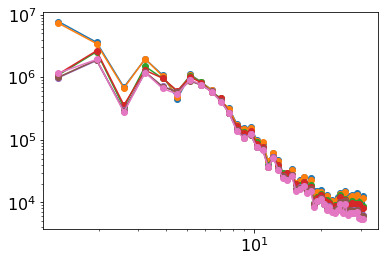

In [48]:
for i in range(n):
    plt.loglog(PST1a[i].wavenumbers,PST1a[i].ps1D,'o-', label=str(i))
    #plt.legend()

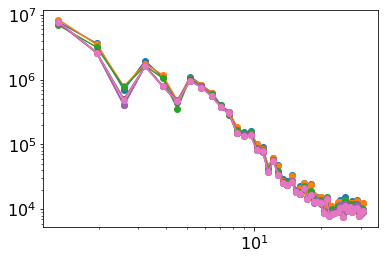

In [49]:
for i in range(n):
    plt.loglog(PST2a[i].wavenumbers,PST2a[i].ps1D,'o-', label=str(i))
    #plt.legend()

In [50]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 1726.9758553504944 seconds ---


In [51]:
#SF1

In [52]:
#SF1.to_csv('SF1.csv')